# Data Science Immersive Project 1: 
### SAT & ACT Analysis & Policy Recommendations to College Board

### Contents:
- [Initialisation and Data Cleaning](#Initialisation-and-Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Discussion and Recommendation to the Board](#Discussion-and-Recommendation-to-the-Board)

## Introduction: How can College Board increase SAT participation rates?
The SAT is a standardised university admissions test administed by College board that com

Using the provided dataset that contains data on SAT and ACT average test scores and participation rates by US state for the year 2017 and 2018, an exploratory analysis and visualisation of the data will be constructed, to identify useful qualitative and quantitative relationships in the data between states, test scores, and participation rates.

Once reasonable relationships have been identified, this data will be used to inform a set of recommendations to College Board on appropriate measures to take that can increase SAT participaction rates in the coming years.

# Initialisation and Data Cleaning

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Importing the datasets
act17=pd.read_csv('../data/act_2017.csv')
sat17=pd.read_csv('../data/sat_2017.csv')
act18=pd.read_csv('../data/act_2018_updated.csv')
sat18=pd.read_csv('../data/sat_2018.csv')

In [3]:
# Displaying the first 10 values of the sat17 dataframe
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# Displaying the first 10 values of the act17 dataframe
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


### Manual Data Inspection
Un

In [5]:
# Checking the data types of the SAT 17 data
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
# Sat17 data cleaning
sat17.rename(columns={'State':'state',
                        'Participation':'sat17participation',
                        'Evidence-Based Reading and Writing':'sat17readwrite',
                        'Math':'sat17math',
                        'Total':'sat17total'},
                        inplace = True)
# The incorrectly entered value for Maryland SAT Math in 2017 is fixed
sat17.loc[sat17['state']=='Maryland','sat17math'] = 524
# The data type of the participation rate is changed to an integer after removing the percentage symbol
sat17['sat17participation'] = pd.to_numeric(sat17['sat17participation'].str.replace('%',''))

In [7]:
# Checking the data types of the ACT 17 data
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [8]:
# Act17 data cleaning
# The columns are renamed to be lowercase and without spaces, while maintaining unique identifiers for year and test type
act17.rename(columns={'State':'state',
                        'Participation':'act17participation',
                        'English':'act17english',
                        'Math':'act17math',
                        'Reading':'act17reading',
                        'Science':'act17science',
                        'Composite':'act17composite'},
                        inplace = True)
# There are two errornous entries in the columns which are fixed
act17.loc[act17['state']=='Wyoming','act17composite'] = 20.2
act17.loc[act17['state']=='Maryland','act17science'] = 23.2
# The data type of the composite column is changed to float
act17['act17composite'] = pd.to_numeric(act17['act17composite'])
# The data type of the participation rate is changed to an integer after removing the percentage symbol
act17['act17participation'] = pd.to_numeric(act17['act17participation'].str.replace('%',''))

In [9]:
# The extra 'national' row in ACT 17 is dropped
act17.drop(act17[act17.state == 'National'].index,inplace=True)

In [10]:
# Placing composite after participation in the ACT 17 data
act17 = act17[['state','act17participation','act17composite','act17english', 'act17math', 'act17reading', 'act17science']]

In [11]:
# The SAT 17 and ACT 17 data are merged as year17 
year17 = pd.merge(sat17,act17, on='state')
# The dataframe is exported as a CSV file
year17.to_csv('../data/combined_2017.csv', index=False)

In [12]:
year17.head()

,state,sat17participation,sat17readwrite,sat17math,sat17total,act17participation,act17composite,act17english,act17math,act17reading,act17science
0,Alabama,5,593,572,1165,100,19.2,18.9,18.4,19.7,19.4
1,Alaska,38,547,533,1080,65,19.8,18.7,19.8,20.4,19.9
2,Arizona,30,563,553,1116,62,19.7,18.6,19.8,20.1,19.8
3,Arkansas,3,614,594,1208,100,19.4,18.9,19.0,19.7,19.5
4,California,53,531,524,1055,31,22.8,22.5,22.7,23.1,22.2


### Data Dictionary of the 2017 data
A brief description of the merged SAT and ACT data types for 2017, as seen in the table above.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|The United States|The 50 States of the United States of America as well the District of Columbia.|
|**sat17participation**|*int*|2017 College Board data|Statewide student SAT participation rate as a percentage of total cohort |
|**sat17readwrite**|*int*|2017 College Board data|Statewide mean reading and writing score of the SAT taking cohort in 2017|
|**sat17math**|*int*|2017 College Board data|Statewide mean math score of the SAT taking cohort in 2017|
|**sat17total**|*int*|2017 College Board data|Statewide mean total score of the SAT taking cohort in 2017|
|**act17participation**|*int*|2017 ACT data|Statewide student ACT participation rate as a percentage of total cohort |
|**act17composite**|*float*|2017 ACT data|Statewide mean composite score of the ACT taking cohort in 2017 |
|**act17english**|*float*|2017 ACT data|Statewide mean english score of the ACT taking cohort in 2017 |
|**act17math**|*float*|2017 ACT data|Statewide mean math score of the ACT taking cohort in 2017 |
|**act17reading**|*float*|2017 ACT data|Statewide mean reading score of the ACT taking cohort in 2017 |
|**act17science**|*float*|2017 ACT data|Statewide mean science score of the ACT taking cohort in 2017 |

### Cleaning of 2018 Data

In [13]:
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [14]:
# ACT 18 data cleaning
# The columns are renamed to be lowercase and without spaces, while maintaining unique identifiers for year and test type
act18.rename(columns={'State':'state',
                        'Percentage of Students Tested':'act18participation',
                        'Average English Score':'act18english',
                        'Average Math Score':'act18math',
                        'Average Reading Score':'act18reading',
                        'Average Science Score':'act18science',
                        'Average Composite Score':'act18composite'},
                        inplace = True)


In [15]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
# SAT 18 data cleaning
# The columns are renamed to be lowercase and without spaces, while maintaining unique identifiers for year and test type
sat18.rename(columns={'State':'state',
                        'Participation':'sat18participation',
                        'Evidence-Based Reading and Writing':'sat18readwrite',
                        'Math':'sat18math',
                        'Total':'sat18total'},
                        inplace = True)
# The data type of the participation rate is changed to an integer after removing the percentage symbol
sat18['sat18participation'] = pd.to_numeric(sat18['sat18participation'].str.replace('%',''))
# The incorrectly entered value for Florida SAT participation in 2018 is fixed
sat18.loc[sat18['state']=='Florida','sat18participation'] = 98

In [17]:
sat18.loc[sat18['state']=='Florida','sat18participation']

9    98
Name: sat18participation, dtype: int64

In [18]:
# The SAT 18 and ACT 18 data are merged as year18 
year18 = pd.merge(sat18,act18, on='state')

In [19]:
# The two sets of year data are merged as final, and exported to the data folder
final = pd.merge(year17, year18, on='state')
final.to_csv('../data/final.csv', index=False)

In [20]:
# A final check of the dataframe to ensure that everything is in order.
final.head()

,state,sat17participation,sat17readwrite,sat17math,sat17total,act17participation,act17composite,act17english,act17math,act17reading,...,sat18participation,sat18readwrite,sat18math,sat18total,act18participation,act18composite,act18english,act18math,act18reading,act18science
0,Alabama,5,593,572,1165,100,19.2,18.9,18.4,19.7,...,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38,547,533,1080,65,19.8,18.7,19.8,20.4,...,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30,563,553,1116,62,19.7,18.6,19.8,20.1,...,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3,614,594,1208,100,19.4,18.9,19.0,19.7,...,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,53,531,524,1055,31,22.8,22.5,22.7,23.1,...,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


# Exploratory Data Analysis

Using the describe() function on the 'final' dataframe, the transposed output creates a table containing the count of values, mean, standard deviation, minimum value, percentiles, and maximum value of each data type.

In [21]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat17participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17readwrite,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act17english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9


### Standard deviation calculation
Using the formula below, the standard deviation of each column is calculated and assigned in the data dictionary 'sd'.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [22]:
# Defining the function
def stddev(data,column):
    initial = 0
    final = 0
    try:
        n = data[column].count()
        mu = data[column].sum()/n
        for x in data[column].tolist():
            initial += (x - mu)**2
        final = np.sqrt(initial/n)
    except:
        final = None
    return final   

In [23]:
# The variable sd is created using dictionary comprehension
sd = {x:stddev(final, x) for x in list(final.columns)} 

In [24]:
# Displaying sd
sd

{'state': None,
 'sat17participation': 34.92907076664508,
 'sat17readwrite': 45.21697020437866,
 'sat17math': 46.65713364485503,
 'sat17total': 91.58351056778743,
 'act17participation': 31.824175751231806,
 'act17composite': 2.000786081581989,
 'act17english': 2.3304876369363363,
 'act17math': 1.9624620273436781,
 'act17reading': 2.0469029314842646,
 'act17science': 1.7222161451443676,
 'sat18participation': 37.6278239260554,
 'sat18readwrite': 47.03460978357609,
 'sat18math': 47.30194550378352,
 'sat18total': 93.22742384464433,
 'act18participation': 33.745194881997506,
 'act18composite': 2.0855261815801147,
 'act18english': 2.4222536143202795,
 'act18math': 2.0157072555557174,
 'act18reading': 2.145891884510421,
 'act18science': 1.851688548483354}

In [25]:
# Variable created using pandas describe method
describeoutput = final.describe().transpose()['std']

In [26]:
# Variable created using numpy std method
stdoutput = final.std()

In [27]:
# Create a comparison table using the output from the previous two method calls
stdcomparison = pd.DataFrame.from_dict(sd,orient='index')
stdcomparison.rename(columns={0:'function_output'}, inplace=True)
stdcomparison.drop(stdcomparison[stdcomparison.function_output.isnull()].index,inplace=True)
stdcomparison['std_output'] = final.std()
stdcomparison['describe_output'] = final.describe().transpose()['std']

In [28]:
# Displaying a table of the calculated output of function sd in comparison to the 
# outputs of the standard deviation calculations of the numpy std method (std_output) and 
# pandas describe method (describe_output)

stdcomparison

,function_output,std_output,describe_output
sat17participation,34.929071,35.276632,35.276632
sat17readwrite,45.216970,45.666901,45.666901
sat17math,46.657134,47.121395,47.121395
sat17total,91.583511,92.494812,92.494812
act17participation,31.824176,32.140842,32.140842
act17composite,2.000786,2.020695,2.020695
act17english,2.330488,2.353677,2.353677
act17math,1.962462,1.981989,1.981989
act17reading,2.046903,2.067271,2.067271
act17science,1.722216,1.739353,1.739353


It appears that the calculated function is different from the numpy and pandas methods, though the methods are the same as each other. This is because the pandas describe method uses an the same numpy method, called seperately here for descriptive purposes.

## Further adjustments to the dataframe

In [29]:
# Create an index series of states
statelist = final['state'].tolist()

In [30]:
# Assigning the states to the index and dropping the numerical index
try:
    final = final.set_index('state')
    final.index.name = None
except:
    pass

In [31]:
final.head()

,sat17participation,sat17readwrite,sat17math,sat17total,act17participation,act17composite,act17english,act17math,act17reading,act17science,sat18participation,sat18readwrite,sat18math,sat18total,act18participation,act18composite,act18english,act18math,act18reading,act18science
Alabama,5,593,572,1165,100,19.2,18.9,18.4,19.7,19.4,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,38,547,533,1080,65,19.8,18.7,19.8,20.4,19.9,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,30,563,553,1116,62,19.7,18.6,19.8,20.1,19.8,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,3,614,594,1208,100,19.4,18.9,19.0,19.7,19.5,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,53,531,524,1055,31,22.8,22.5,22.7,23.1,22.2,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


## Observing changes in participation rates

In [32]:
# Two new columns are added to the 'final' dataframe that show participation rates change between 17 and 18.
final['satparticipationchange'] = final['sat18participation'] - final['sat17participation']
final['actparticipationchange'] = final['act18participation'] - final['act17participation']
# A mask is created for this new table
showparticipation = ['sat17participation', 'sat18participation', 'satparticipationchange', 'act17participation', 'act18participation', 'actparticipationchange']

In [33]:
# Highest 2017 SAT participation
final[showparticipation].sort_values('sat17participation', ascending= False)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
District of Columbia,100,92,-8,32,32,0
Michigan,100,100,0,29,22,-7
Connecticut,100,100,0,31,26,-5
Delaware,100,100,0,18,17,-1
New Hampshire,96,96,0,18,16,-2


In [34]:
# Lowest 2017 SAT participation
final[showparticipation].sort_values('sat17participation', ascending= True)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
North Dakota,2,2,0,98,98,0
Mississippi,2,3,1,100,100,0
Iowa,2,3,1,67,68,1
Missouri,3,4,1,100,100,0
Utah,3,4,1,100,100,0


In [35]:
# Highest 2017 ACT participation
final[showparticipation].sort_values('act17participation', ascending= False)[:20]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Alabama,5,6,1,100,100,0
Kentucky,4,4,0,100,100,0
Wisconsin,3,3,0,100,100,0
Utah,3,4,1,100,100,0
Tennessee,5,6,1,100,100,0
South Carolina,50,55,5,100,100,0
Oklahoma,7,8,1,100,100,0
North Carolina,49,52,3,100,100,0
Nevada,26,23,-3,100,100,0
Montana,10,10,0,100,100,0


In [36]:
# Lowest 2017 ACT participation
final[showparticipation].sort_values('act17participation', ascending= True)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Maine,95,99,4,8,7,-1
New Hampshire,96,96,0,18,16,-2
Delaware,100,100,0,18,17,-1
Rhode Island,71,97,26,21,15,-6
Pennsylvania,65,70,5,23,20,-3


In [37]:
# Highest 2018 SAT participation
final[showparticipation].sort_values('sat18participation', ascending= False)[:7]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Colorado,11,100,89,100,30,-70
Connecticut,100,100,0,31,26,-5
Delaware,100,100,0,18,17,-1
Michigan,100,100,0,29,22,-7
Idaho,93,100,7,38,36,-2
Maine,95,99,4,8,7,-1
Illinois,9,99,90,93,43,-50


In [38]:
# Lowest 2018 SAT participation
final[showparticipation].sort_values('sat18participation', ascending= True)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
North Dakota,2,2,0,98,98,0
Wyoming,3,3,0,100,100,0
South Dakota,3,3,0,80,77,-3
Nebraska,3,3,0,84,100,16
Wisconsin,3,3,0,100,100,0


In [39]:
# Highest 2018 ACT participation
final[showparticipation].sort_values('act18participation', ascending= False)[:20]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Alabama,5,6,1,100,100,0
Kentucky,4,4,0,100,100,0
Wisconsin,3,3,0,100,100,0
Utah,3,4,1,100,100,0
Tennessee,5,6,1,100,100,0
South Carolina,50,55,5,100,100,0
Oklahoma,7,8,1,100,100,0
Ohio,12,18,6,75,100,25
North Carolina,49,52,3,100,100,0
Nevada,26,23,-3,100,100,0


In [40]:
# Lowest 2018 ACT participation
final[showparticipation].sort_values('act18participation', ascending= True)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Maine,95,99,4,8,7,-1
Rhode Island,71,97,26,21,15,-6
New Hampshire,96,96,0,18,16,-2
Delaware,100,100,0,18,17,-1
Pennsylvania,65,70,5,23,20,-3


In [41]:
# Table of states where participation either rose or fell from 100%
change = ((((final['sat17participation'] == 100) | (final['sat18participation'] == 100)) & (final['satparticipationchange'] != 0)) |
           (((final['act17participation'] == 100) | (final['act18participation'] == 100)) & (final['actparticipationchange'] != 0)))
final[showparticipation].loc[change]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Colorado,11,100,89,100,30,-70
District of Columbia,100,92,-8,32,32,0
Idaho,93,100,7,38,36,-2
Minnesota,3,4,1,100,99,-1
Nebraska,3,3,0,84,100,16
Ohio,12,18,6,75,100,25


#### Rate change of states with 100% participation in either test
From the tables generated above:
- The following states increased to 100% participation in SATs:
    - Idaho, from 93%
    - Colorado, from 11%
- The following states decreased from 100% participation in SATs:
    - District of Columbia, to 8%
- The following states increased to 100% participation in ACTs:
    - Ohio, from 75%
    - Nebraska, from 84%    
- The following states decreased from 100% participation in ACTs:
    - District of Columbia, to 8%
    - Minnesota, to 99%
    

In [42]:
# Creating a mask to show states with more than 50% participation in both tests
mask17 = (final['sat17participation'] > 50) & (final['act17participation'] > 50)
mask18 = (final['sat18participation'] > 50) & (final['act18participation'] > 50)

In [43]:
# States with more than 50% participation in both tests in 2017
final[showparticipation].loc[mask17]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Florida,83,98,15,73,66,-7
Georgia,61,70,9,55,53,-2
Hawaii,55,56,1,90,89,-1


In [44]:
# States with more than 50% participation in both tests in 2018
final[showparticipation].loc[mask18]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Florida,83,98,15,73,66,-7
Georgia,61,70,9,55,53,-2
Hawaii,55,56,1,90,89,-1
North Carolina,49,52,3,100,100,0
South Carolina,50,55,5,100,100,0


In [45]:
# States with largest change in SAT participation
final[showparticipation].sort_values('satparticipationchange', ascending= False)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Illinois,9,99,90,93,43,-50
Colorado,11,100,89,100,30,-70
Rhode Island,71,97,26,21,15,-6
Florida,83,98,15,73,66,-7
West Virginia,14,28,14,69,65,-4


In [46]:
# States with largest change in ACT participation
final[showparticipation].sort_values('actparticipationchange', ascending= False)[:5]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Ohio,12,18,6,75,100,25
Nebraska,3,3,0,84,100,16
Arizona,30,29,-1,62,66,4
Maryland,69,76,7,28,31,3
Oregon,43,48,5,40,42,2


### Interesting States
In this author's opinion, the three most interesting states are Colorado, Illinois, and Florida.

Colorado and Illinois both changed their state mandated high school examination from ACTs to SATs in 2018, resulting in large and opposite changes in participation rates for the two tests.

Florida is interesting for the large change in SAT participation that can be qualitatively explained by College Board treatments between 2017 and 2018. This is expanded upon in the outside reading section.

# Data Visualisation

In [47]:
def hotzones(data, columnfilter,titlename, colormap = "Blues", figuresize = (16,9)):
    datamask = np.zeros_like(data[columnfilter].corr())
    datamask[np.triu_indices_from(datamask)] = True
    plt.figure(figsize = figuresize)
    plt.title(titlename)
    sns.heatmap(final[columnfilter].corr(), mask=datamask, square=True, annot=True, cmap=colormap)

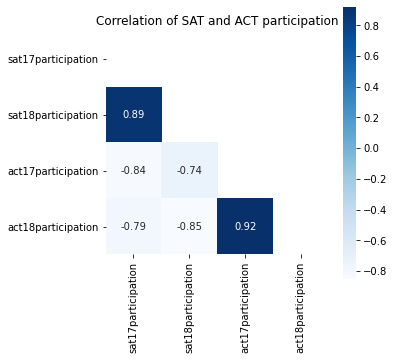

In [48]:
participationonly = ['sat17participation', 'sat18participation',
                     'act17participation', 'act18participation']
hotzones(final, participationonly, 'Correlation of SAT and ACT participation', figuresize = (5,5))

#### Correlations of SAT and ACT participation
SAT participation in 2017 is relatively strongly correlated with SAT18 participation, as is ACT participation in 2017 with ACT participation in 2018. Conversely, ACT and SAT participation are negatively correlated with each other, both in the same year and across the time period. This suggests that as an overarching trend, states have one main test that the majority of students do.

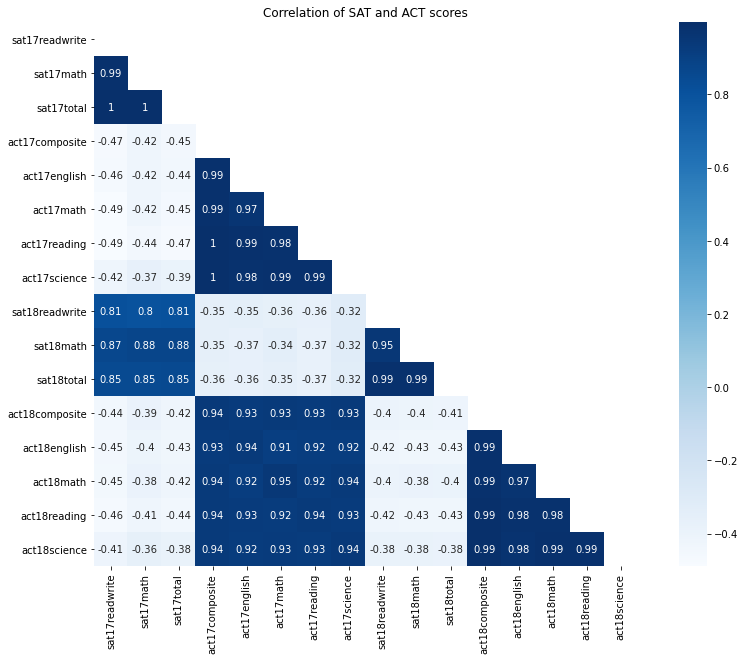

In [49]:
scoresonly = ['sat17readwrite', 'sat17math', 'sat17total',
        'act17composite', 'act17english', 'act17math', 'act17reading', 'act17science',
        'sat18readwrite', 'sat18math', 'sat18total',
        'act18composite', 'act18english', 'act18math', 'act18reading', 'act18science'
        ]
hotzones(final, scoresonly,'Correlation of SAT and ACT scores', figuresize = (15,10))

#### Correlations of SAT and ACT scores
ACT scores in various subtests are strongly correlated with scores in other ACT subtests, both in the same year as well as cross the time period.
Similarly, SAT scores in the two subsections and the total are strongly correlated with other SAT scores, both in the same year as well as cross the time period.
Interestingly, there is a weak negative correlation between SAT scores and ACT scores.

The negative correlation of scores may reflect one or more negative relationships between ACT scores and SAT scores within states. 

Given that the data does not reflect if students are taking both tests or mutually exclusive student populations are taking each test, it is difficult to propose reasonable reasons for this effect that can be backed up by data.

However, one effect that can be observed is that in certain states that switched from mandatory testing in one test to the other between 2017 and 2018, a subset of students who took the mandatory test also attended the other test. For example, this can be seen in the data for Colorado, which switched from the ACT to the SAT for statewide testing between 2017 and 2018. It can actually be seen that the average SAT score fell and the average ACT score rose for students. A reason for this is that there is a selection bias for more academically minded students who are prepared enough to take both tests. These students therefore outperform the general population, raising the average when the test is no longer mandatory.

However, this cannot be conclusively investigated without controlling for difficulty of the test as well as changes in academic competency between cohorts.

In [50]:
# A table that provides context to the above paragraph
final.loc[change]

,sat17participation,sat17readwrite,sat17math,sat17total,act17participation,act17composite,act17english,act17math,act17reading,act17science,...,sat18math,sat18total,act18participation,act18composite,act18english,act18math,act18reading,act18science,satparticipationchange,actparticipationchange
Colorado,11,606,595,1201,100,20.8,20.1,20.3,21.2,20.9,...,506,1025,30,23.9,23.9,23.2,24.4,23.5,89,-70
District of Columbia,100,482,468,950,32,24.2,24.4,23.5,24.9,23.5,...,480,977,32,23.6,23.7,22.7,24.4,23.0,-8,0
Idaho,93,513,493,1005,38,22.3,21.9,21.8,23.0,22.1,...,493,1001,36,22.3,21.9,21.6,23.2,22.1,7,-2
Minnesota,3,644,651,1295,100,21.5,20.4,21.5,21.8,21.6,...,655,1298,99,21.3,20.2,21.4,21.7,21.4,1,-1
Nebraska,3,629,625,1253,84,21.4,20.9,20.9,21.9,21.5,...,623,1252,100,20.1,19.4,19.8,20.4,20.1,0,16
Ohio,12,578,570,1149,75,22.0,21.2,21.6,22.5,22.0,...,547,1099,100,20.3,19.3,20.3,20.8,20.4,6,25


# Histograms

In [2]:
# Define a custom histogram
def histplots(columnfilter, data = final, figuresize = (10, 8), columns = 2, y_label = None, x_label = None, xsublabels = None):
    rows = int(round((len(columnfilter)/columns),0))
    fig, ax = plt.subplots(nrows = rows, ncols = columns, figsize = figuresize)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    ax = ax.ravel()
    for i, j in enumerate(columnfilter):
        try:
            ax[i].hist(data[j])
            ax[i].set_title(j)
        except:
            pass
    plt.show()
    

NameError: name 'final' is not defined

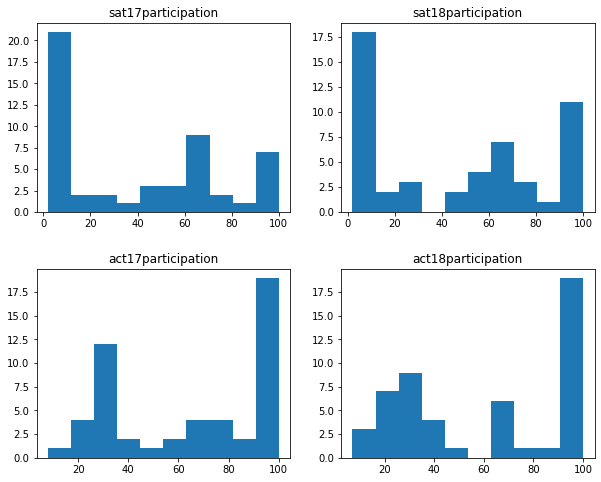

In [52]:
# participation rates for both tests
histplots(participationonly)

For SAT data, the frequency of levels of participation are clustered at above 90% and below 10%, with states having less than 10% participation in the SAT being the most common. 

For ACT data, a much higher frequency of states with more than 90% participation can be observed in both years.

It is interesting to note that while there are many instances of SAT participation below 10% in both time periods, the same is not true for ACT participation below 10% in both time periods. This may be because the ACT is more accessible to interested private individuals taking it electively, reflecting a relatively sizable subset of students in each state where the ACT is not mandatory, taking it regardless.

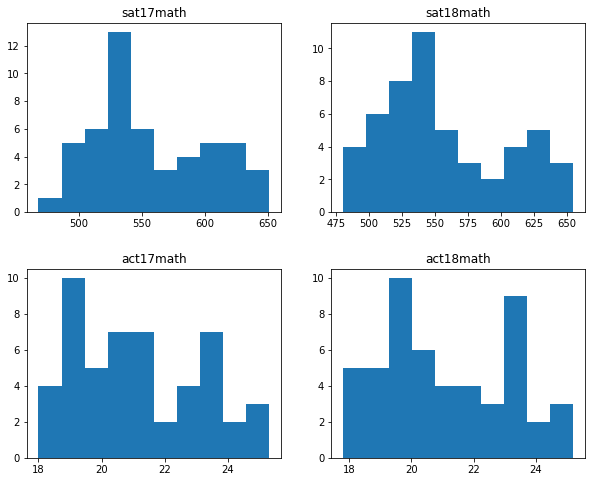

In [53]:
# Math scores only 
mathscoresonly = ['sat17math', 'sat18math',
                 'act17math', 'act18math']
histplots(mathscoresonly)

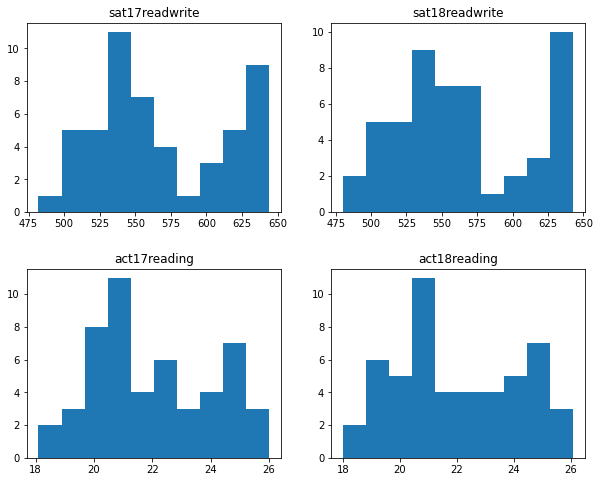

In [54]:
readingscoresonly = ['sat17readwrite', 'sat18readwrite',
                 'act17reading', 'act18reading']
histplots(readingscoresonly)

In the math and reading scores for both SAT and ACT scores in both years, a general trend can be observed. In each histogram there are at least two clusters of scores. In no subset can the data be described as approximating a normal distribution. 

It appears that every math and reading score has a positive skew, with a longer upward tail. 
Of the many possible contributing factors, it may be that the selection bias in each state with respect to the less popular tests may have the subset of students doing the test having a higher than average competency, resulting in higher average scores, as noted previously. 

Another possible reason is that the standardised test design of both ACT and SAT attempts to enforce banding at certain breakpoints in test scores, resulting the high observed incidences of one particular score band. While it was not investigated, it is likely that these score bands mostly contain the states with high participation percentages.

Another issue is that many states have less than 5% participation rate in the SATs, yet the scores of these small student populations are reflected on the histogram of SAT scores with no appropriate weighting to distinguish between small and large student populations. Unfortunately, no weighting is possible in the limited dataset as student counts are not given by state cohort.

In [55]:
#Should you wish to save the figures, add the code below to the function
#plt.savefig('filepath.png', dpi = 300)

# Scatter plots

In [56]:
# Custom scatterplot function that annotates each datapoint
def scatplot(column1, column2, title=None, x_label=None, y_label=None, data = final,figuresize=(10,8)):
    fig, ax = plt.subplots(figsize=figuresize)
    data.plot(column1,column2, kind='scatter', ax=ax, s=120, linewidth=0)
    statetarget = 0
    for x,y in zip(data[column1].tolist(),data[column2].tolist()):
        pointlabel = statelist[statetarget]
        statetarget += 1
        plt.annotate(pointlabel, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    try:
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
    except:
        pass
    plt.savefig(f'../graphs/{title}.png', dpi = 300)
    plt.show()

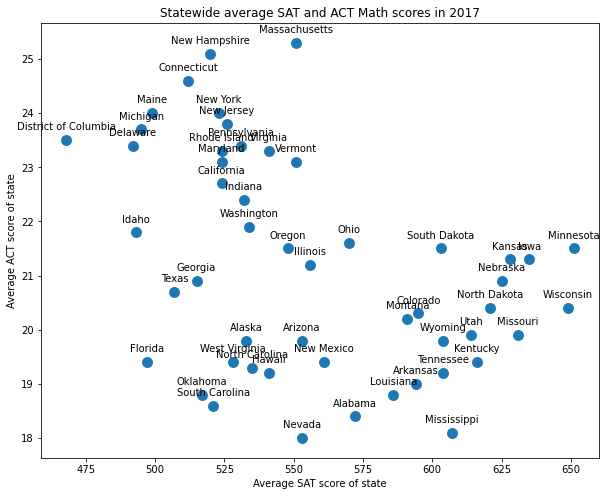

In [57]:
scatplot('sat17math','act17math',
         title = "Statewide average SAT and ACT Math scores in 2017",
         x_label='Average SAT score of state',
         y_label='Average ACT score of state')

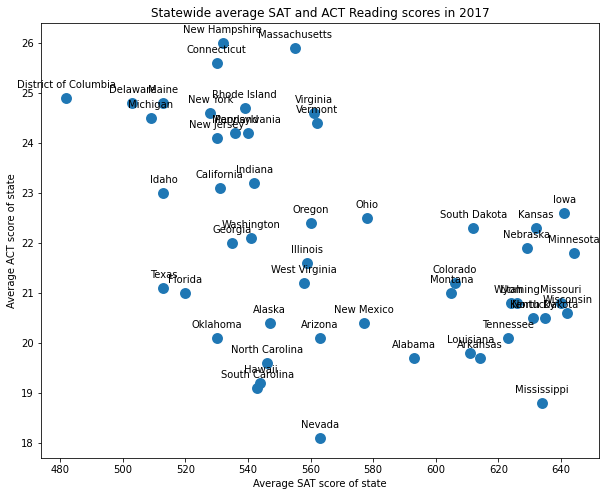

In [58]:
scatplot('sat17readwrite','act17reading',
         title = "Statewide average SAT and ACT Reading scores in 2017",
         x_label='Average SAT score of state',
         y_label='Average ACT score of state')

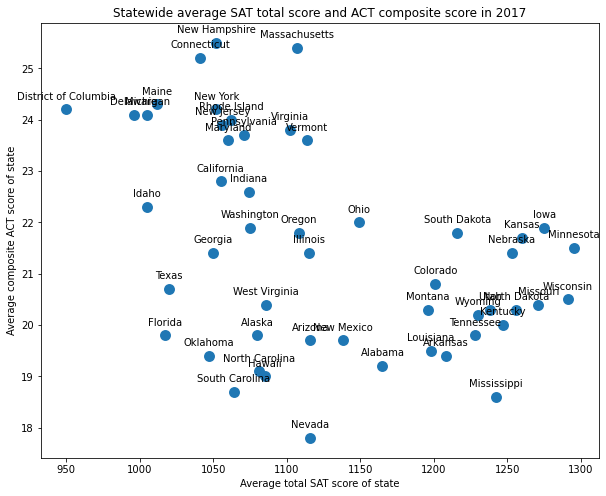

In [59]:
scatplot('sat17total','act17composite',
         title = "Statewide average SAT total score and ACT composite score in 2017",
         x_label='Average total SAT score of state',
         y_label='Average composite ACT score of state')

In each of the three previous graphs, it can be observed that there is a rough inverse correlation of unknown identification, between the average SAT and ACT scores of each state.

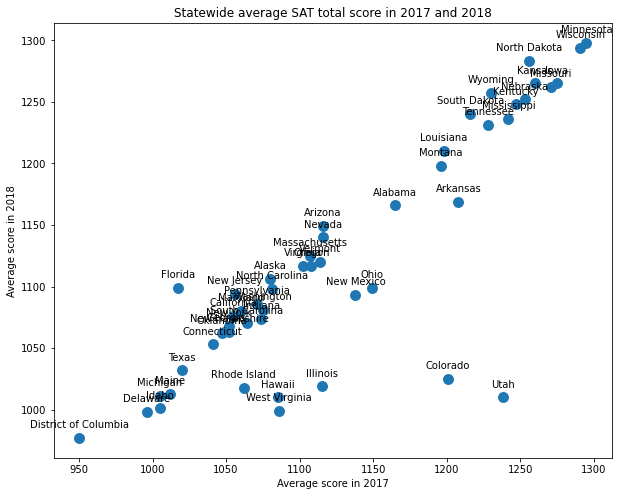

In [60]:
scatplot('sat17total','sat18total',
         title = "Statewide average SAT total score in 2017 and 2018",
         x_label='Average score in 2017',
         y_label='Average score in 2018')

Many states had noticably better SAT scores in 2017 than in 2018, though most of these states also increased SAT participation in 2018 relative to 2017. This wider catchment of students may have brought down the average in these states relative to the smaller slice in 2017 of SAT taking students in each of these states.

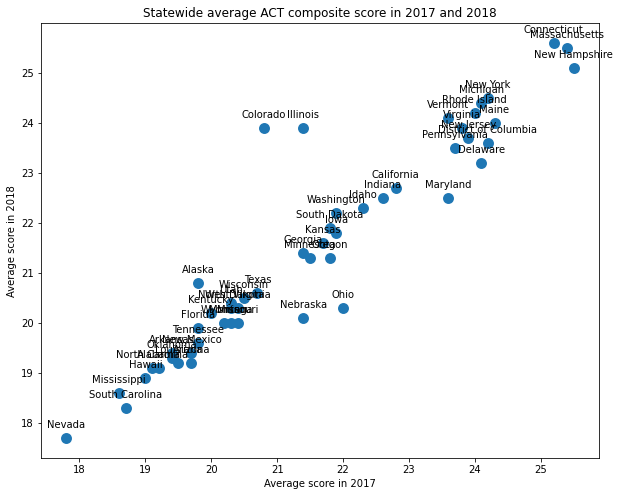

In [61]:
scatplot('act17composite','act18composite',
         title = "Statewide average ACT composite score in 2017 and 2018",
         x_label='Average score in 2017',
         y_label='Average score in 2018')

Most states broadly maintained their ACT scores over the period, with two exceptions: Colorado and Illinois both switched from the ACT to the SAT as the statewide test between 2017 and 2018. For these states, the average scores of the students that did the ACT in 2018 was much higher than 2017 when such a trend was not observed in other states.

# Boxplot

In [62]:
satscoresonly = ['sat17readwrite', 'sat17math', 'sat17total',
        'sat18readwrite', 'sat18math', 'sat18total']
actscoresonly = ['act17composite', 'act17english', 'act17math', 'act17reading', 'act17science',
        'act18composite', 'act18english', 'act18math', 'act18reading', 'act18science']
finalsatscores=final.loc[:, satscoresonly]
finalactscores=final.loc[:, actscoresonly]

In [63]:
finalactscores.rename(columns={'act17english':'English 17',
                        'act17math':'Math 17',
                        'act17reading':'Reading 17',
                        'act17science':'Science 17',
                        'act17composite':'Composite 17',
                        'act18english':'English 18',
                        'act18math':'Math 18',
                        'act18reading':'Reading 18',
                        'act18science':'Science 18',
                        'act18composite':'Composite 18'},inplace=True)


In [64]:
finalsatscores.rename(columns={'sat17readwrite':'Reading 17',
                        'sat17math':'Math 17',
                        'sat17total':'Total 17',
                        'sat18readwrite':'Reading 18',
                        'sat18math':'Math 18',
                        'sat18total':'Total 18',},inplace=True)


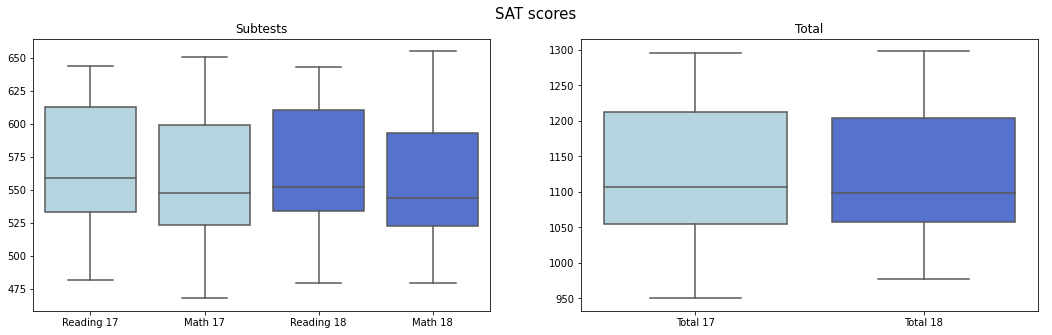

In [65]:
# Displaying SAT subscores
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)# The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
satmask1 = ['Reading 17', 'Math 17','Reading 18', 'Math 18']
satmask2 = ['Total 17', 'Total 18']
sns.boxplot(data=finalsatscores[satmask1],ax=ax1,
           palette=['lightblue' if ('17' in x) else 'royalblue' for x in satmask1])
sns.boxplot(data=finalsatscores[satmask2],ax=ax2,
           palette=['lightblue' if ('17' in x) else 'royalblue' for x in satmask2])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Set common labels
ax.set_title('SAT scores',fontdict={'fontsize':15},pad=20)
ax1.set_title('Subtests')
ax2.set_title('Total')
plt.savefig('../graphs/SATBox.png', dpi = 300)
plt.show()

All the SAT scores have a positive skew, with a majority of observations being below the mean. There are no clear outliers.

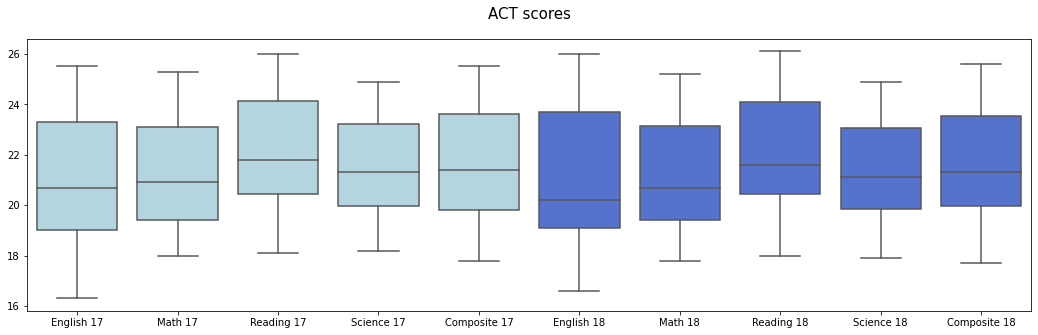

In [66]:
fig,ax = plt.subplots(figsize=(18,5))
actmask = ['English 17', 'Math 17', 'Reading 17', 'Science 17', 'Composite 17',
     'English 18', 'Math 18', 'Reading 18', 'Science 18', 'Composite 18']
sns.boxplot(data=finalactscores[actmask],ax=ax,
           palette=['lightblue' if ('17' in x) else 'royalblue' for x in actmask])
ax.set_title('ACT scores',fontdict={'fontsize':15},pad=20)
plt.savefig('../graphs/ACTBoxAll the ACT scores have a positive skew, with a majority of observations being below the mean..png', dpi = 300)
plt.show()

Similarly, all the ACT scores have a positive skew, with a majority of observations being below the mean. Of note is that English scores in the ACT have a much wider spread than the rest of the test statistics. There are no clear outliers.

# Descriptive and Inferential Statistics
### Summarizing distributions
***According to CLT, we generally assume that data we sample from a population will be normally distributed. Do we observe this trend?***

The central limit theorem states that given a population with an mean μ and standard deviation σ, taking multiple, independent, sufficiently large random samples of size n from the population, with replacement, will create a set of sample means wherein the distribution of the sample means will be approximately normally distributed regardless of the distribution of the source population, as long as each sample size is sufficiently large (n > 30).
Furthermore, the "fuzzy" central limit theorem says that sample data that is influenced by many small and unrelated random effects can be assumed to be approximately normally distributed.

**We do not observe this trend in the math, reading, or participation rates of the data as they are presented in the provided data sets.** 

None of the sample sets approximate a normal distribution in the shape of their data.

In both the math and reading data sets for both years and both tests, all the samples are observed to be positively skewed, with samples often displaying multiple peaks. 

In the participation rate data, the sample for sat participation in 2017 was positively skewed while the rest were negatively skewed. Furthermore, there was clustering of participation rates at extreme values (usually 100%) that was observed in each rate sample, rather than a smooth distribution.

These can be explained by the sampling method of the data sets provided. For CLT to hold, repeated random independent samples from a population must be taken. Instead, the data sets provided are singular samples taken from mutually exclusive subsections of the population (as they are state by state). As previously discussed, there are selection biases inherent in each sample, meaning that the samples are nonrandom.

**Given the nature of the samples collected, it is safe to say that the Math, Reading and Participation rates samples are not normally distributed.**

### Estimating limits of data
##### Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. Does it make sense to conduct statistical inference given these data specifically? 
Statistical inference on data that is not is not normally distributed does not make sense.
##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?
It is inappropriate to use the SAT and ACT math scores in the sample data to make observations on which students are better. Firstly, the sample set contains students who have taken both tests, as is the case in states like Colorado. With no way to remove such students, the two sets overlap, complicating meaningful comparison.

Secondly, the two tests have different measures of aptitude, with diferent test structures and different marking schemes. It is not possible to construct a baseline with which to make a comparion between scores on different scales with the available data set.

Thirdly, there are many selection biases inherent in the populations of students taking each test. Which state the student lives in and whether or not that test is mandatory, the price of each test affecting the socioeconomic status of students that take each test, and so on, all have an effect on the ability of students that take each test.

Thus, it is inappropriate to ocompare the SAT and ACT math scores.

Additionally, it is eminently inappropriate to run hypothesis tests to compare variables of interest, due to the non-normal distribution of every variable in the dataset, for reasons previously discussed.

# Outside Research

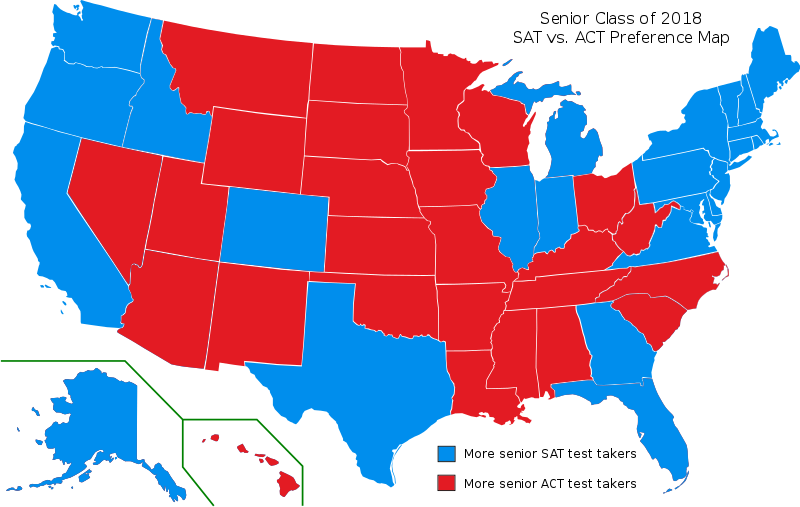

In [67]:
# A map of preferences found from Wikipedia
from IPython.display import Image
Image(filename='../pictures/Preference-Map.png')

From the picture, it can be observed that broadly speaking, states away from the coast are the ones the prefer to take the ACT over the SAT, with the exception of North and South Carolina.

The three states of interest are Florida, Colorado, and Illinois.
Note the positions of the three states on a scatter plot of statewide average math SAT scores in 2017 vs 2018. Florida's scores improved noticeably in 2018, while Illinois and Colorado deproved significantly over the same time period.
The website by Testive [[*3*]](#[3]--%E2%80%9CColorado-Changed-to-the-SAT-in-2017:-What-You-Need-to-Know.%E2%80%9D) notes that Colorado made SATs mandatory in 2017, while this article from Patch [[*4*]](#[4]-%E2%80%9CIllinois-SAT-Scores-Lag-Behind-Nation.%E2%80%9D) notes that as SAT participation rose, SAT math scores fell, while the converse happed for ACT math scores in Illinois, which improved despite the fall in the national average that year.

This provides ammunition to the idea of selection bias in that only the most enthusiastic and well supported students would attempt both the mandatory as well as the non mandatory accountability exam, accounting for the change in test scores on year when policy changes which test is mandatory.

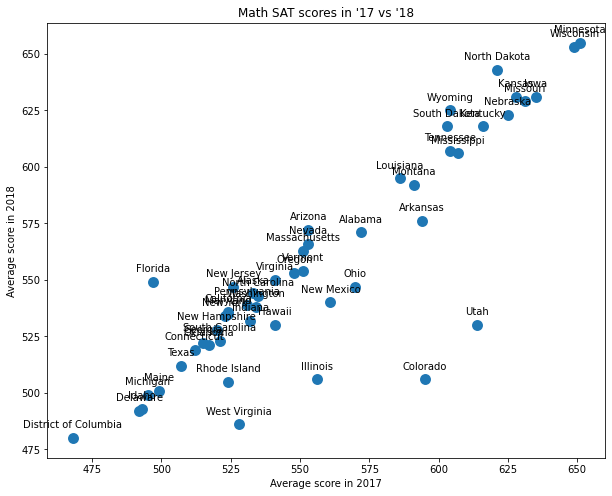

In [68]:
scatplot('sat17math','sat18math', title = "Math SAT scores in '17 vs '18",x_label='Average score in 2017',y_label='Average score in 2018')

An article by American test preperation website discusses the attitude of top universities towards the SAT reading and writing section. [[*6*]](#[6]-%E2%80%9CHarvard-Drops-the-SAT-Essay-Requirement,-What-Does-This-Mean-for-Your-Students?%E2%80%9D)

In the article, it states that universities such as Harvard are no longer requiring the SAT reading and writing component to be submitted, largely due to the section being the least predictive of academic aptitude. This can be compared to our histograms of SAT subsection scores plotted below. It is clear that the reading and writing test has a large right sided discontinuity of scores between 630 and 650. Given what the article states, the skewed distribution of scores supports the assertion.

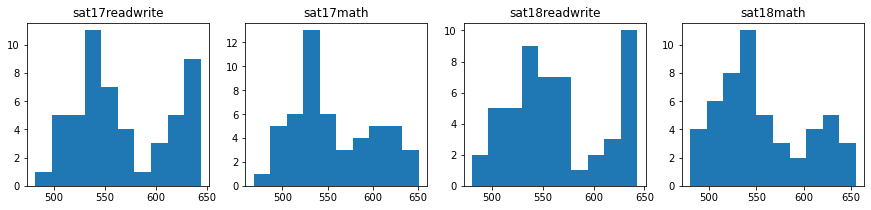

In [69]:
# Histogram of SAT scores
satscoresonly = ['sat17readwrite', 'sat17math',
        'sat18readwrite', 'sat18math']
histplots(satscoresonly, figuresize = (15, 3), columns = 4)

In 201, College Board rolled out a program that allowed students to take the SAT on School days at no additional cost. [[*8*]](#[8]-“New-York-City-Offers-SAT-to-All-High-School-Juniors,-Hoping-to-Clear-a-Path-to-College.”)[[*9*]](#[9]-“SAT-School-Day.”) Thanks to this program, 25% more students in 2018 than in 2017 in New York took the SATs. Rather than pay the fee to take the SATs on the weekend, allowing students to take the test for free on a school day had a large effect on test participation.

From the College Board website, this report [[*10*]](#[10]-“SAT-School-Day.”-“More-Than-2-Million-Students-in-the-Class-of-2018-Took-the-SAT,-Highest-Ever.”) notes that providing preparatory material created gains in student accomplishment for those that took advantage.
- Data from 2017 reveal that 20 hours of practice using OSP on Khan Academy is associated with an average 115-point increase from the PSAT/NMSQT to the SAT. That's double the score gain of students who didn't use Official SAT Practice.
- A recent study of the class of 2017, titled "Delivering Opportunities", found students who scored below 800 improved the most, compared to students with higher scores who practiced for just as many hours. Students who scored below 800 on the PSAT/NMSQT and spent at least 20 hours on Official SAT Practice gained about 180 points (compared to 80–90 points for those who didn't use their scores to get a customized study plan).
- Regardless of race/ethnicity, gender, or income level, students raised their scores through practice. [[*10*]](#[10]-“SAT-School-Day.”-“More-Than-2-Million-Students-in-the-Class-of-2018-Took-the-SAT,-Highest-Ever.”)

Further quotes from the College Board report demonstrate the commitment and direction of SAT test taking in the future. Quoted from the report:
- "Five years ago, we made a promise to transform the SAT into a test that delivers opportunities. We changed the test itself, upended the landscape of costly test prep by offering free, personalized practice for all, and propelled students forward with fee waivers and scholarship opportunities. What is at stake is not higher scores. It's students having the opportunity to own their future," said David Coleman, CEO of the College Board. [[*10*]](#[10]-“SAT-School-Day.”-“More-Than-2-Million-Students-in-the-Class-of-2018-Took-the-SAT,-Highest-Ever.”)

The report further details the growth of the SAT School Day program and easily demonstrates it's effacacy in improving participation:
- In the 2017-18 school year, nearly one million students participated in SAT School Day, compared to about 800,000 in 2016-17 and 460,000 in 2015-16. In 2014-15, only three states—Delaware, Idaho, Maine—and the District of Columbia participated in SAT School Day. In 2017-18, 10 states—Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, West Virginia—and the District of Columbia gave the SAT to public school students for free. SAT School Day has grown significantly, as has the consensus among researchers that offering the SAT no cost during the school day eases the way to college for more students. [[*10*]](#[10]-“SAT-School-Day.”-“More-Than-2-Million-Students-in-the-Class-of-2018-Took-the-SAT,-Highest-Ever.”)

Also of interest is the article from the Orlando Sentinel [[*1*]](#[1]-%E2%80%9CSAT,-ACT:-Florida-Students-Lag-behind-National-Averages.%E2%80%9D) that comments on the measures taken by College Board to increase the attractiveness of taking the SAT. The article states: 
    -"Officials attributed the increase to many school districts, including those in Central Florida, offering free SAT 'school day' events, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents."

Another change made in Florida that likely increased the uptake of the SAT was the increase in availibility of resources to students. The article states:  
- "The College Board also partnered with the Khan Academy to provide free, online SAT review lessons and practice tests. Gaudreau said those have proved a good resource and also helped make the SAT the more popular exam."

This change may also be able to explain the improvement on year that the Florida cohorts made in math scores. Though they still performed slightly below the national average in 2018 (see below), it shows that there is definite room for improvement in test scores.


In [70]:
# Mean national SAT math score in 2018
final['sat18math'].describe().loc['mean']

556.2352941176471

# Discussion and Recommendation to the Board

In this section, this report will provide recommentations with respect to Kansas.
The data provided has been useful for exploring simple trends in SAT and ACT participation rates. Consider the table below:

In [71]:
# A table with every state that has low SAT participation rates in both years
final[showparticipation].loc[(final['sat17participation'] < 10) & (final['sat18participation'] < 10)]

,sat17participation,sat18participation,satparticipationchange,act17participation,act18participation,actparticipationchange
Alabama,5,6,1,100,100,0
Arkansas,3,5,2,100,100,0
Iowa,2,3,1,67,68,1
Kansas,4,4,0,73,71,-2
Kentucky,4,4,0,100,100,0
Louisiana,4,4,0,100,100,0
Minnesota,3,4,1,100,99,-1
Mississippi,2,3,1,100,100,0
Missouri,3,4,1,100,100,0
Nebraska,3,3,0,84,100,16


It can be observed that every state with below 10% participation in the SAT in both years is relatively rural, with many of these states being in the Midwest. Additionally, not all of these states have >90% participation in the ACT, suggesting that it may not just be statewide policy in these states that causes this.

### Recommendations to College Board for measures in Kansas (or indeed any of the states in the table above)

The first option to College board is to work together with state education boards to pursue policy reform with the intention of making SAT participation mandatory statewide. This was done in Illinois and Colorado and contributed to the two largest positive changes in SAT parcipation observed between 2017 and 2018. It should be noted that this was achieved by College Board submitting better bids than the ACT. It is likely that incentivising state education boards to jump ship with price packages and logistical support will be necessary.

The second option to College Board to increase SAT participation is to increase the marginal attractiveness through of SAT participation by private individuals in states without mandatory participation. The case study of Florida and the effects of the SAT school day are relevant in this: by improving accessibility of preparatory material, students were both encouraged to take the SAT and better prepared, resulting in both better participation rates and better scores. Additionally, by providing financial incentives in the form of cheaper test taking, students in Florida at the margins were better able to afford to take the test. 

In general, College Board should continue to build upon the success of the initial rollout of SAT School Day as well as other measures taken in 2018 to improve the rate at which students are taking SATs. It should be noted that the measures are already bearing fruit, as 2018 was a record year for SAT participation rate [[*5*]](#[5]-%E2%80%9CMore-Students-Are-Taking-the-SAT-Than-Ever-Before.%E2%80%9D).
- Improve accessibility of preparation material
    - Provide travelling workships that visit schools and provide advice on SAT taking
    - Provide more free online material similar to the Khan Academy partnership mentioned in [[*1*]](#[1]-%E2%80%9CSAT,-ACT:-Florida-Students-Lag-behind-National-Averages.%E2%80%9D)
- Improve accessibility of test taking by reducing prices
    - Measures such as SAT School day [[*8*]](#[8]-“New-York-City-Offers-SAT-to-All-High-School-Juniors,-Hoping-to-Clear-a-Path-to-College.”)[[*9*]](#[9]-“SAT-School-Day.”) that reduce the cost of taking the SAT are shown to have a large impact on the number of students taking the test
- Improve accessibility of test taking in sparsely populated states
    - It is unlikely to be a coincidence that the states with low SAT participation are all relatively rural. By making test taking more friendly in such states, participation may increase.
- Improve public perception of usefulness of SAT test taking
    - As noted in [[*5*]](#[5]-%E2%80%9CMore-Students-Are-Taking-the-SAT-Than-Ever-Before.%E2%80%9D), College Board needs to address the public perception of class discrimination in testing

### Better experiment design for future investigation of effectiveness of College Board measures
College Board is already beginning to collect socioeconomic data together with test results, as part of it's commitment to providing relevant socioeconomic data to colleges along with academic results, in order to improve the fairness of admissions decision making.

With a dataset of (anonymised) student identification, test participation and associated socioeconomic status, a time series regression can be designed where the effectiveness of measures that target marginal populations of specific socioeconomic status can be statistically investigated across different sample populations. This is necessary given that the cohort of test takers changes every year. By matching students of socio economic status across time periods, a set of matched samples with approximately equal mean and variance can be formed, enabling statistical testing.

For example, one possible form of the regression could be:

$$y_t=x_t\beta+ε_t$$

where:

$yt$ is the change of participation rate in SAT tests of a given sample socioeconomic population in period t        
$x_t\beta$ is the set of interventions in period t that are hypothesized to  affect the participation rate        
$ε_t$ is an error term

With a more complete data set, a linear regression model could be explored and thus a more robust statistical forecast of the effectiveness of treatment measures that improve SAT participation could be made.

# Appendix
###### Appendix 1: Citations
###### [1] “SAT, ACT: Florida Students Lag behind National Averages.” 
Postal, Leslie. Orlandosentinel.com, Orlando Sentinel, 6 Apr. 2019, www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html.

###### [2] “SAT Scores Rise, as Do the Numbers of Test-Takers.”
POLITICO, 25 Oct. 2018, www.politico.com/newsletters/morning-education/2018/10/25/sat-scores-rise-as-do-the-numbers-of-test-takers-388387.

###### [3]  “Colorado Changed to the SAT in 2017: What You Need to Know.” 
Wheeler, Daniel. Testive, 10 July 2018, www.testive.com/colorado-sat-change-2017/.

###### [4] “Illinois SAT Scores Lag Behind Nation.” 
Antinori, Shannon. Across Illinois, IL Patch, Patch, 29 Oct. 2018, www.patch.com/illinois/across-il/illinois-sat-scores-lag-behind-nation.

###### [5] “More Students Are Taking the SAT Than Ever Before.” 
U.S. News &amp; World Report, U.S. News & World Report, www.usnews.com/news/education-news/articles/2019-09-24/more-students-are-taking-the-sat-than-ever-before.

###### [6] “Harvard Drops the SAT Essay Requirement, What Does This Mean for Your Students?” 
Laet, Katie Rose-De. Applerouth, www.applerouth.com/blog/2018/04/10/harvard-drops-the-sat-essay-requirement-what-does-this-mean-for-your-students/.

###### [7] “File:SAT-ACT-Preference-Map.svg.” 
File:SAT-ACT-Preference-Map.svg - Wikimedia Commons, www.commons.wikimedia.org/wiki/File:SAT-ACT-Preference-Map.svg.

###### [8] “New York City Offers SAT to All High School Juniors, Hoping to Clear a Path to College.” 
Veiga, Christina.Chalkbeat New York, Chalkbeat New York, 3 Apr. 2017, www.ny.chalkbeat.org/2017/4/3/21099704/new-york-city-offers-sat-to-all-high-school-juniors-hoping-to-clear-a-path-to-college.

###### [9] “SAT School Day.” 
SAT Suite of Assessments, 11 May 2018, www.collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day.

###### [10] “SAT School Day.” “More Than 2 Million Students in the Class of 2018 Took the SAT, Highest Ever.” 
The College Board, 18 Mar. 2019, www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever.

###### Appendix 2: External Data Sources
2017 ACT Data 
https://nces.ed.gov/programs/digest/d17/tables/dt17_226.60.asp

2017 SAT Data
https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

2018 ACT Data
http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf

2018 SAT Data
https://reports.collegeboard.org/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf

https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf